## 1. Introduction

**[Naukri.com](https://www.naukri.com/)** is an Indian **employment website** operating in India and Middle East.  Naukri was ranked No.1 by 9 independent sources, placing it way ahead of competition.Google Trends names Naukri “the most preferred job search destination in India”.


## 2. Import Libraries and Load Data

In [64]:
# import libraries
import re
import pandas as pd

import folium
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.probability import FreqDist

In [65]:
# load data
df=pd.read_csv('naukri_data_science_jobs_india.csv')
print('Successfully read file into Dataframe...')

Successfully read file into Dataframe...


In [66]:
# concise summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Job_Role            12000 non-null  object
 1   Company             12000 non-null  object
 2   Location            12000 non-null  object
 3   Job Experience      12000 non-null  object
 4   Skills/Description  12000 non-null  object
dtypes: object(5)
memory usage: 468.9+ KB


In [88]:
df.isnull().sum()

,0
Job_Role,0
Company,0
Location,0
Job Experience,0
Skills/Description,0
Min. Exp.,0
Max. Exp.,0


In [68]:
# shape of dataframe
print('Number of Rows: {}'.format(df.shape[0]))
print('Number of Columns: {}'.format(df.shape[1]))

Number of Rows: 12000
Number of Columns: 5


In [90]:
# first five rows
df.head()

,Job_Role,Company,Location,Job Experience,Skills/Description,Min. Exp.,Max. Exp.
0,Senior Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",3-6,"python, MLT, statistical modeling, machine lea...",3,6
1,Senior Data Scientist,Walmart,Bangalore/Bengaluru,5-9,"Data Science, Machine learning, Python, Azure,...",5,9
2,Applied Data Scientist / ML Senior Engineer (P...,SAP India Pvt.Ltd,Bangalore/Bengaluru,5-10,"Python, IT Skills, Testing, Cloud, Product Man...",5,10
3,Data Scientist,UPL,"Bangalore/Bengaluru, Mumbai (All Areas)",1-4,"python, machine learning, Data Science, data a...",1,4
4,Data Scientist,Walmart,Bangalore/Bengaluru,4-8,"IT Skills, Python, Data Science, Machine Learn...",4,8


In [91]:
# user defined functions

def MinExp(txt):
    num = int(txt.split('-')[0])
    return num

def MaxExp(txt):
    num = int(txt.split('-')[1])
    return num

def preprocess_location(loc):
    loc=re.split('\(', loc)[0].strip()
    loc=re.sub('New Delhi','Delhi',loc)
    return loc

## 3. Exploratory Data Analysis

After looking at the dataset this seems like a good cleaned dataset (thanks to the author). I wanted to recreate the same in Python. So, as of now i've tried my best to put the data in some neat looking visuals.


*   Visualize the Top 5 Job Roles using Bar chart
*   Visualize the top skills required using column chart
*   Visualize top job locations spread across in india for data science jobs
*   Visualizing the top hiring companies with most no. of job openings related to data science field
*   Visualize the top 10 Demanding skills required for Data Scientist using column chart
*   Visualize most asked minimum experience for data science jobs and Visualize most asked Maxium experience for data science jobs







### 3.1 Job Role

In [92]:
# top 10 jobs
job_10=df['Job_Role'].value_counts()[:10].rename_axis('Job Role').reset_index(name='Count')
job_10.style.background_gradient(cmap='Greys')

,Job Role,Count
0,Data Engineer,580
1,Data Scientist,505
2,Data Analyst,352
3,Senior Technical Lead (Data Engineer),276
4,Business Analyst,197
5,Senior Data Engineer,197
6,Senior Data Scientist,97
7,Azure Data Engineer,80
8,Data Engineer: Data Integration,75
9,Big Data Engineer,71


In [93]:
top5_roles = df['Job_Role'].value_counts()[:5]
fig = px.bar(y=top5_roles.values,
             x=top5_roles.index,
             color = top5_roles.index,
             color_discrete_sequence=px.colors.sequential.OrRd,
             text=top5_roles.values,
             title= 'Top 5 JobTitle',
             template= 'plotly')
fig.update_layout(
    xaxis_title="JobTitle",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))

In [94]:
import pandas as pd
import plotly.express as px
from nltk.probability import FreqDist

dataframe_list = []  # Initialize an empty list to collect DataFrames

for job in job_10['Job Role']:
    df1 = df[df['Job_Role'] == job]
    skill = [skill.lower() for skills in df1['Skills/Description'] for skill in skills.split(', ') if skill != 'IT Skills']
    fdist = FreqDist(skill)
    fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
    fdist_df = fdist_df.sort_values(by='count', ascending=False)[:10]
    fdist_df = fdist_df.assign(job=job)
    dataframe_list.append(fdist_df)  # Append the DataFrame to the list

# Concatenate all DataFrames in the list into a single DataFrame
dataframe = pd.concat(dataframe_list, ignore_index=True)

# Creating sunburst chart
fig = px.sunburst(dataframe,
                  path=['job', 'skill'],
                  values='count'
                 )

fig.update_layout(
    autosize=False,
    title_text='Top Jobs and the Required Skills',
    title_x=0.5,
    width=1080,
    height=720)

# Display the figure
fig.show()


### 3.2 Location

In [108]:
# values in location column
df['Location'][:10]

,Location
0,"Bangalore/Bengaluru, Mumbai (All Areas)"
1,Bangalore/Bengaluru
2,Bangalore/Bengaluru
3,"Bangalore/Bengaluru, Mumbai (All Areas)"
4,Bangalore/Bengaluru
5,Bangalore/Bengaluru
6,Bangalore/Bengaluru
7,"Bangalore/Bengaluru, Mumbai (All Areas)"
8,Bangalore/Bengaluru
9,Chennai


In [96]:
## top 10 job locations

# splitting values and saving into a list
loc=df['Location'].tolist()
loc=[j.strip() for i in [j.strip() for i in loc for j in i.split(',')] for j in i.split('/')]

# count
fdist = FreqDist(loc)
loc_df=pd.DataFrame(list(dict(fdist).items()), columns=['location', 'job openings'])

# removing alternate names
for loc in ['Bengaluru','Secunderabad','Cochin','NCR','Gurugram']:
    loc_df=loc_df[loc_df['location']!=loc]

# applying function
loc_df['location']=loc_df['location'].apply(preprocess_location)
loc_df=loc_df.groupby('location').sum().reset_index(level=0)

# top 10 locations
loc_df=loc_df.sort_values(by='job openings',ascending=False)[:10]
loc_df.style.background_gradient(cmap='mako_r')

,location,job openings
17,Bangalore,4752
137,Pune,2045
71,Hyderabad,1958
114,Mumbai,1461
38,Chennai,1301
62,Gurgaon,1255
46,Delhi,781
126,Noida,545
96,Kolkata,291
2,Ahmedabad,222


### 3.3 Required Skills

In [97]:
# Top 10 demanding skills in data science jobs
skills=[j.lower() for i in df['Skills/Description'] for j in i.split(', ')]
fdist = FreqDist(skills)
skill_df=pd.DataFrame(fdist.items(),
                      columns=['Skill', 'Frequency']
                    ).sort_values('Frequency', ascending=False)[:10]
skill_df.style.background_gradient()

,Skill,Frequency
0,python,3148
4,it skills,2905
3,machine learning,1778
20,data analysis,1614
47,sql,1524
22,big data,1393
23,computer science,1339
87,analytical,1306
8,data science,1287
15,cloud,1240


In [98]:
# plot

default_color = "grey"
colors = {"python": "crimson"}

color_discrete_map = {
    c: colors.get(c, default_color)
    for c in skill_df.Skill.unique()}

fig = px.bar(skill_df, x='Frequency', y='Skill',color='Skill',orientation='h',color_discrete_map=color_discrete_map)
fig.update_layout(
    autosize=False,
    title_text='Top 10 Skills',
    title_x=0.5,
    width=900,
    height=600)

fig.show()

### 3.4 Company

In [99]:
# number of companies available
df['Company'].nunique()

3502

In [100]:
# top 10 companies
df_company=df['Company'].value_counts()[:10].rename_axis('Company').reset_index(name='Job Openings')
df_company.style.background_gradient(cmap='binary')

,Company,Job Openings
0,Accenture,490
1,IBM,316
2,Infostretch solutions Pvt. Ltd.,304
3,Huquo Consulting Pvt. Ltd,295
4,Anicalls,115
5,BNY Mellon,103
6,Microsoft,92
7,Deutsche Bank,84
8,Career Infosystem,82
9,Serving Skill,76


### 3.5 Job Experience

In [102]:
# top 10 values in 'Job Experience'
df['Job Experience'].value_counts()[:10]

,count
Job Experience,
5-10,944
2-5,833
3-8,690
3-5,589
4-9,582
2-7,537
3-6,504
5-8,495
3-7,454


In [109]:
# outliers in 'Job Experience' column
lst=[]
for i in df['Job Experience']:
    c=False
    for j in i:
        if j.isalpha():
            c=True
    if c==True:
        lst.append(i)

lst

[]

In [110]:
# removing outliers
for j in lst:
    df=df[df['Job Experience'] != j]

In [111]:
# new features
df['Min. Exp.'] = df['Job Experience'].apply(MinExp)
df['Max. Exp.'] = df['Job Experience'].apply(MaxExp)

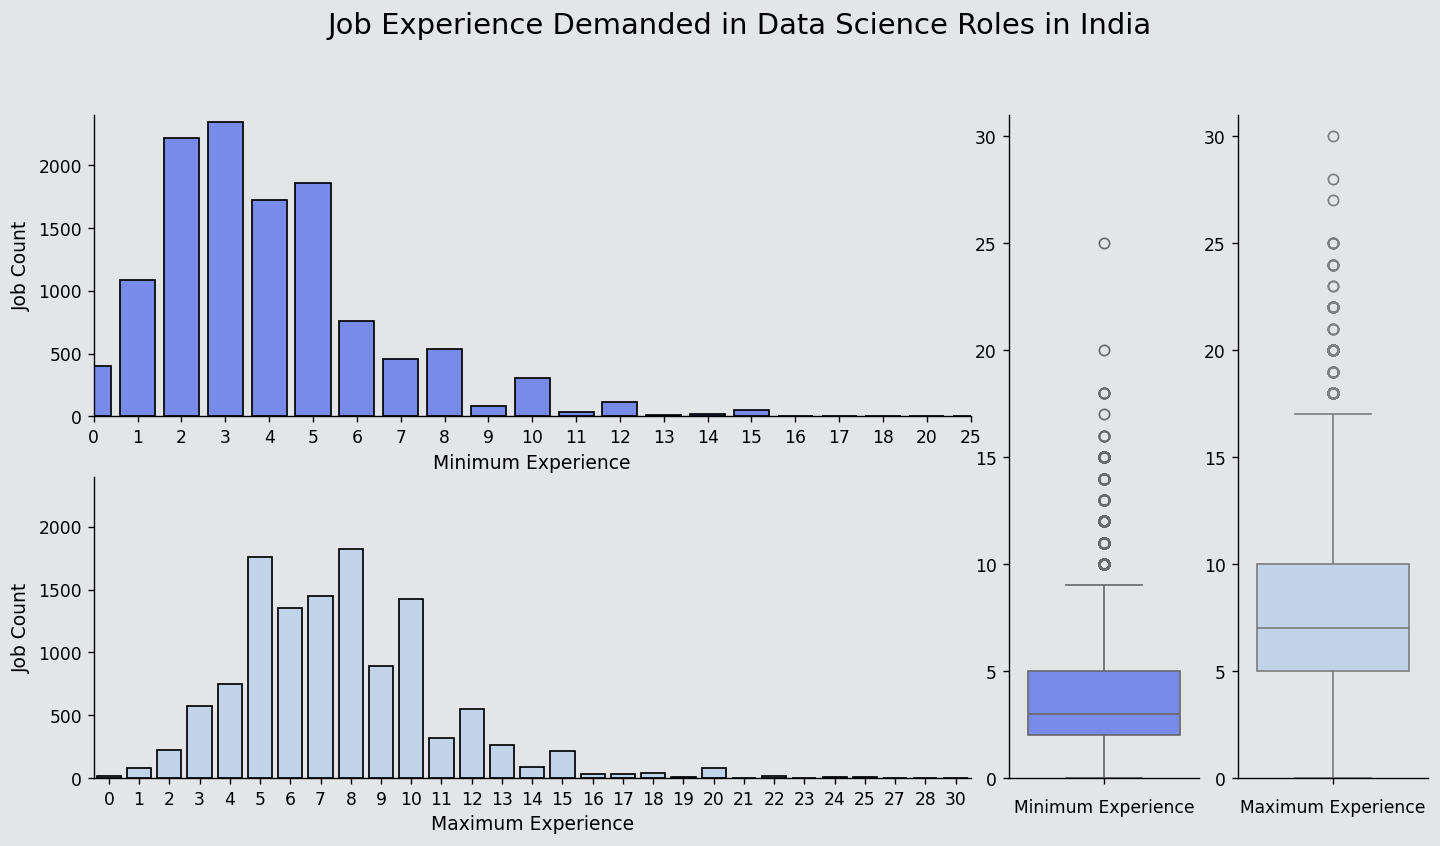

In [112]:
# plot - Job Experience Demanded in Data Science Roles in India

fig = plt.figure(figsize=(14, 7), dpi=123, facecolor='#e4e5e9')
spec = fig.add_gridspec(ncols=6, nrows=2)

ax0 = fig.add_subplot(spec[0, :4])
sns.countplot(x='Min. Exp.',data=df, color='#657ffb', edgecolor='black')
plt.ylabel("Job Count", fontsize=11)
plt.xlabel('Minimum Experience', fontsize=11)
plt.xlim(0,20)
plt.ylim(0,2400)

ax1 = fig.add_subplot(spec[1, :4])
sns.countplot(x='Max. Exp.',data=df, color='#bad2ef',  edgecolor='black')
plt.ylabel("Job Count", fontsize=11)
plt.xlabel('Maximum Experience', fontsize=11)
plt.ylim(0,2400)
# plt.xlim(0,20)

ax2 = fig.add_subplot(spec[:, 4])
sns.boxplot(y=df['Min. Exp.'], color='#657ffb')
plt.xlabel('Minimum Experience',labelpad=5, fontsize=10)
plt.ylim(0,31)
plt.ylabel('')

ax3 = fig.add_subplot(spec[:, 5])
sns.boxplot(y=df['Max. Exp.'], color='#BAD2EF')
plt.xlabel('Maximum Experience',labelpad=5, fontsize=10)
plt.ylabel('')
plt.ylim(0,31)

for ax in [ax0,ax1,ax2,ax3]:
    ax.patch.set_alpha(0.0)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Job Experience Demanded in Data Science Roles in India', fontsize=17, y=1)
plt.show()

In [113]:
# Average Minimum Job Experience Required Top Jobs
job_list = df['Job_Role'].value_counts().iloc[:10].index.tolist()
exp = [round(df[df['Job_Role']==job]['Min. Exp.'].mean(),2) for job in job_list]

df_job=pd.DataFrame({'Jobs':job_list, 'Average Min. Exp':exp})
df_job=df_job.sort_values('Average Min. Exp', ascending=False)
df_job

,Jobs,Average Min. Exp
3,Senior Technical Lead (Data Engineer),4.99
5,Senior Data Engineer,4.65
6,Senior Data Scientist,4.65
7,Azure Data Engineer,4.12
8,Data Engineer: Data Integration,3.97
9,Big Data Engineer,3.62
0,Data Engineer,3.53
1,Data Scientist,3.43
4,Business Analyst,2.64
2,Data Analyst,2.55


This analysis is one in my bucket list while i was learning Data Analytics. I wanted to know the availabilty of data science and data anayst jobs that will be available for me to grasp. But unfortunaly i wasn't able to scrape the data myself. This dataset is exactly what i was searching for. I found the insights very helpful and understood that i should soon start to learn python for data analysis :/ May be in the future i will try to come up with my own scraped data and similar or better visuals.